<h1 style="font-size: 50px; color: #004d00 ;text-align: center;
"> WATER QUALITY  </h1>

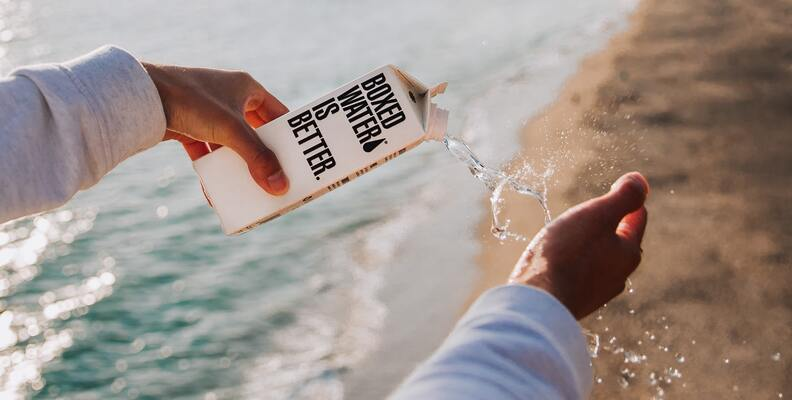

### This is a set of data created from imaginary data of water quality in an urban environment. I recommend using this dataset for educational purposes, for practice and to acquire the necessary knowledge. from this data set i want to check that the safety of the water is correlated with other factors.

### Import libraries and packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler,LabelEncoder, label_binarize
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier

### Reading Dataset

In [2]:
df=pd.read_csv('waterQuality.csv')
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


## Let’s have a look at the insights of the columns to understand the data type of all the columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

### Then find out How many Raws and columns that the dataset contains

In [4]:
df.shape

(7999, 21)

## Finding the statistical meashures

In [5]:
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


### Let’s have a look at whether this dataset contains any null values or not

In [6]:
df.isnull().mean()*100

aluminium      0.0
ammonia        0.0
arsenic        0.0
barium         0.0
cadmium        0.0
chloramine     0.0
chromium       0.0
copper         0.0
flouride       0.0
bacteria       0.0
viruses        0.0
lead           0.0
nitrates       0.0
nitrites       0.0
mercury        0.0
perchlorate    0.0
radium         0.0
selenium       0.0
silver         0.0
uranium        0.0
is_safe        0.0
dtype: float64

### check whether any duplicate values

In [7]:
df.duplicated().sum()

0

## Label Encoder
###  converting object data to numeric

In [8]:
le=LabelEncoder()
df['is_safe']=le.fit_transform(df['is_safe'])

<h1 style="font-size: 30px; color: #003380 ;text-align: center;
"> Exploratory Data Analysis </h1>

## Univariate analysis
###  Analyze the data by Plotiing the Histplot

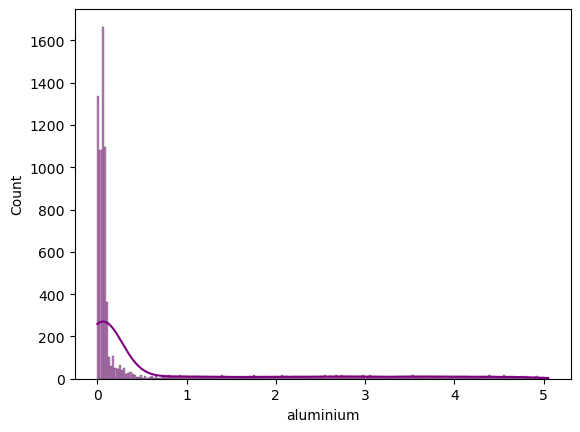

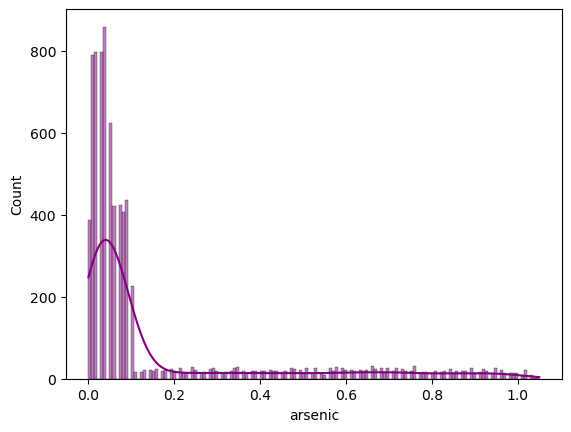

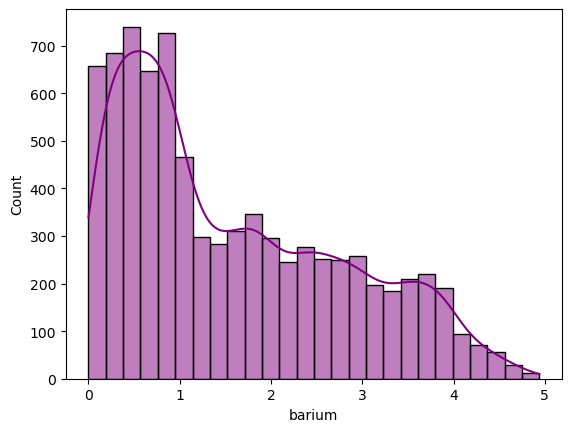

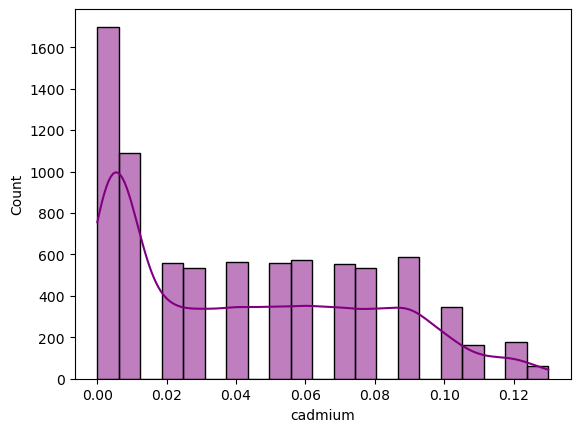

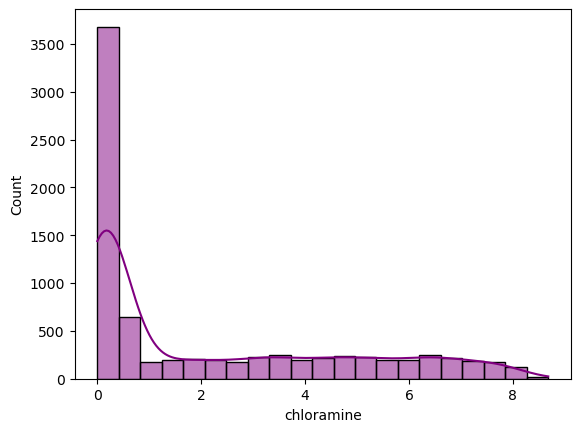

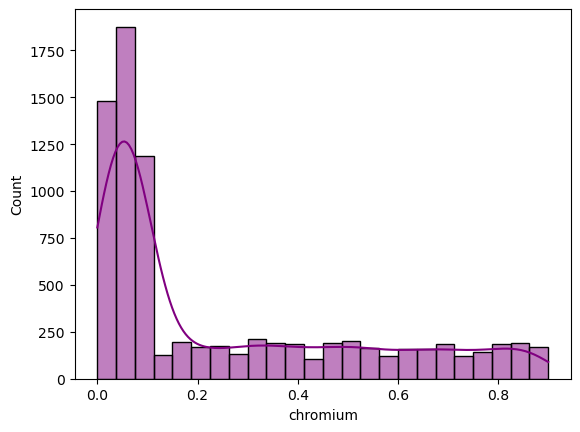

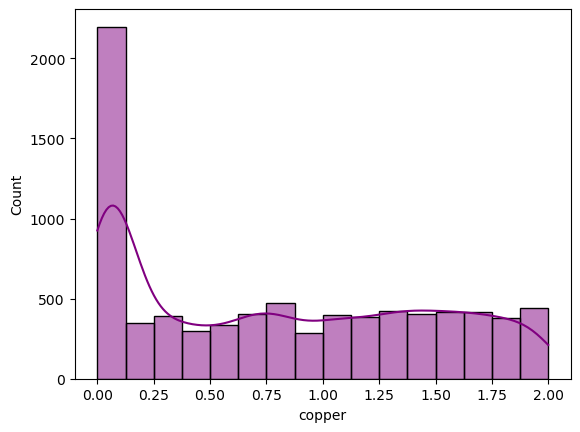

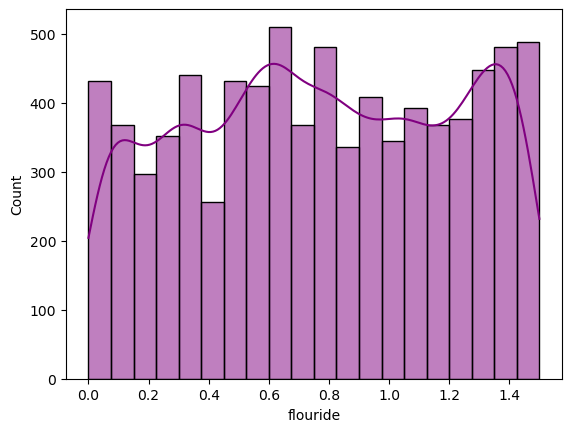

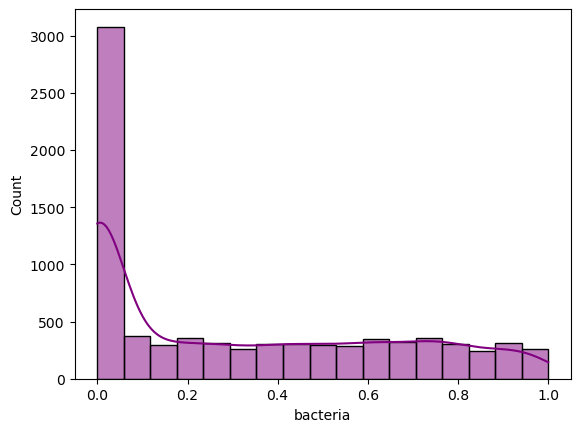

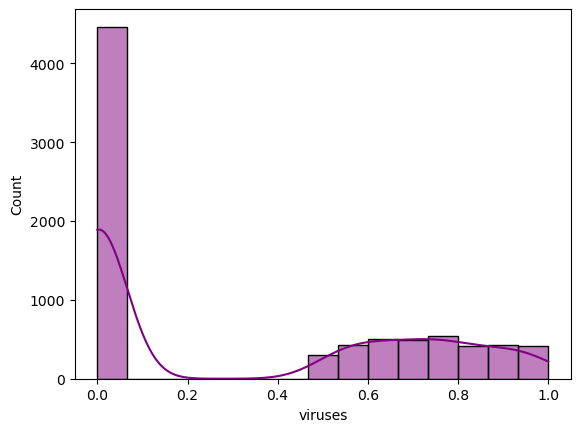

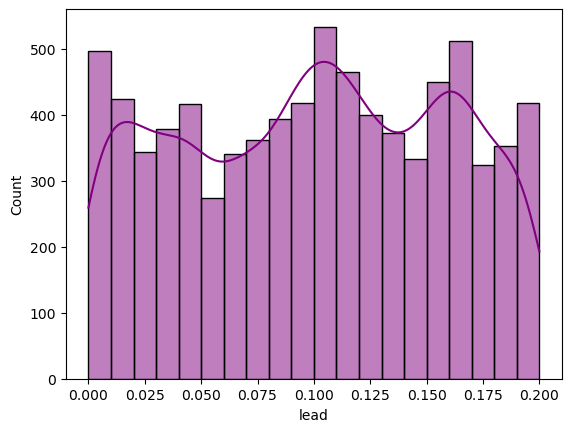

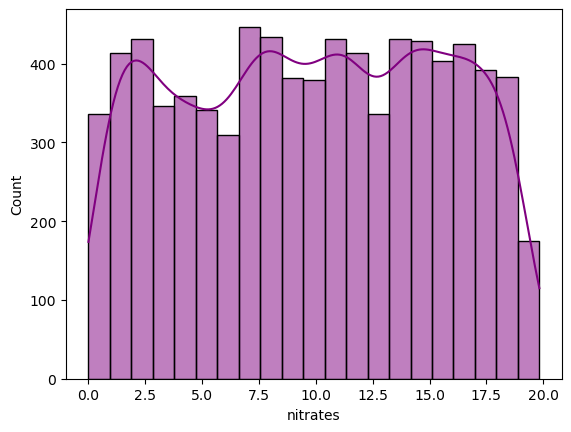

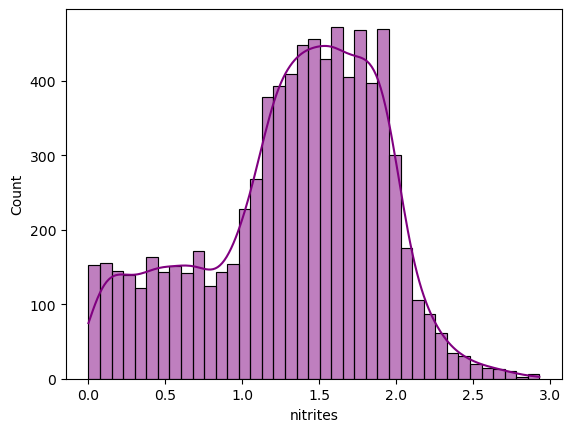

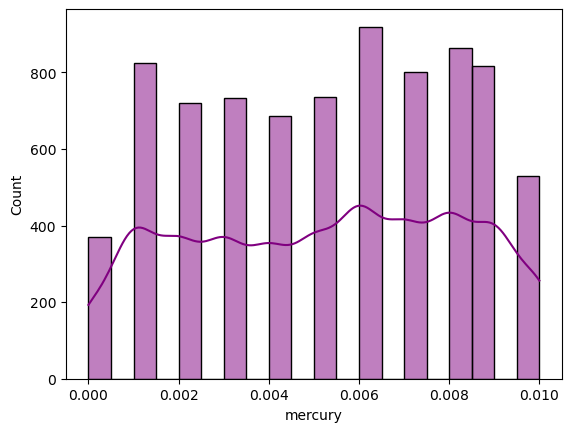

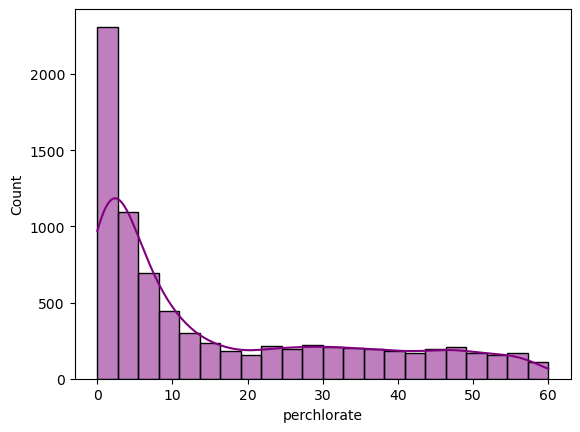

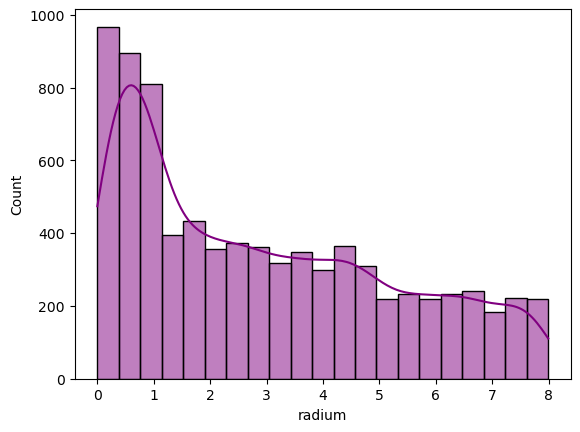

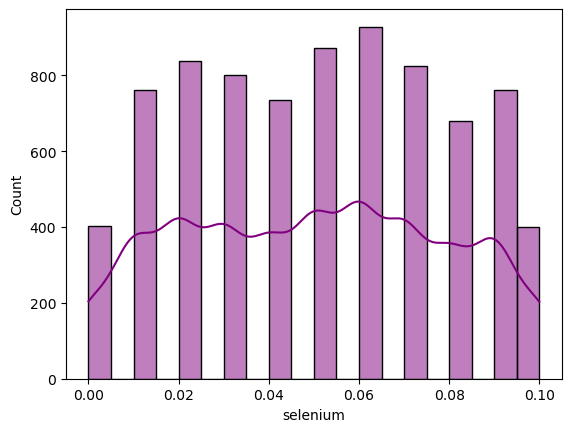

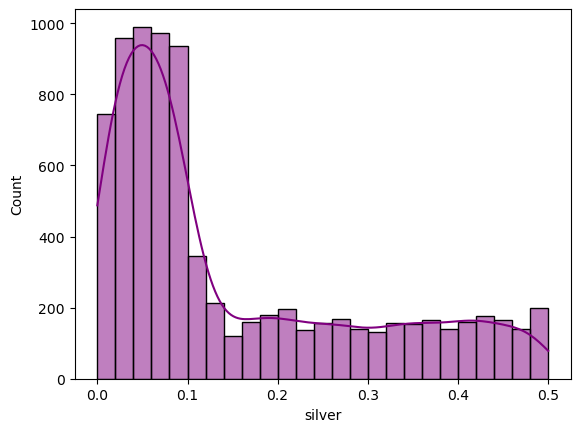

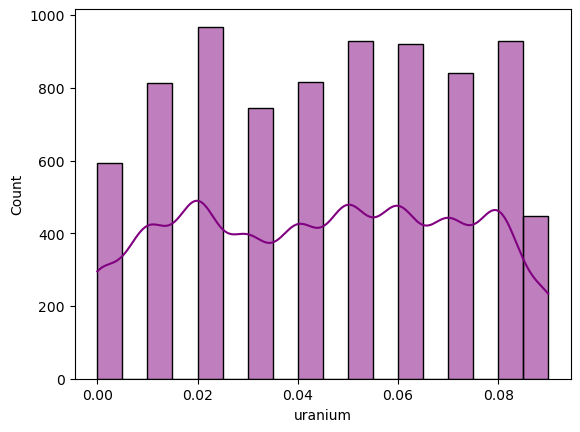

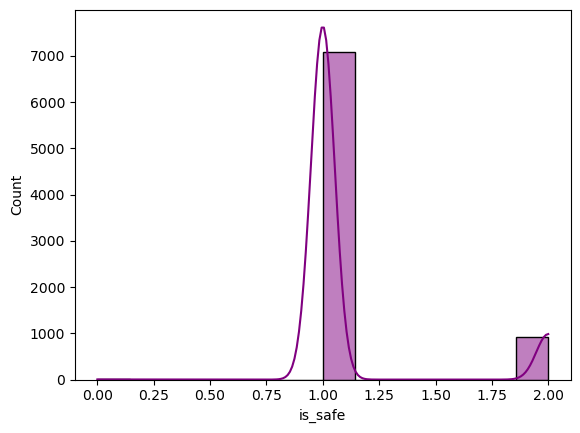

In [9]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i],kde=True,color='purple')
        plt.show()

### Analyze the data by plottinig kde plot

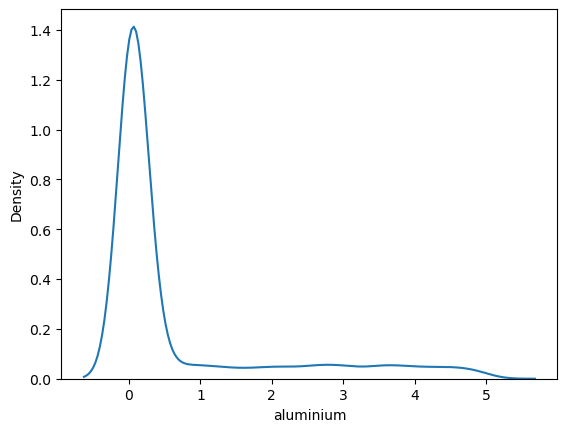

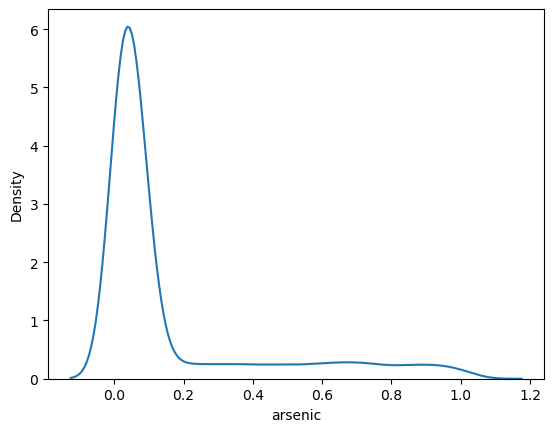

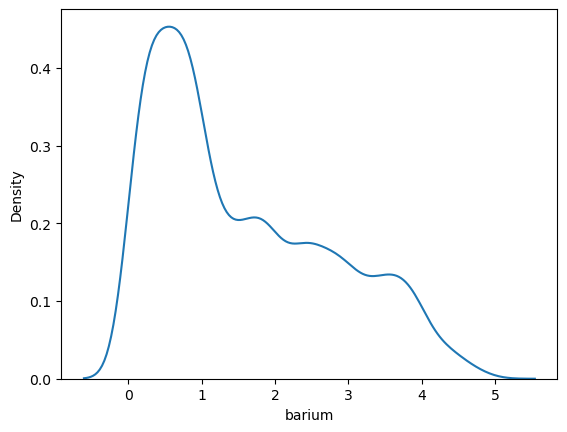

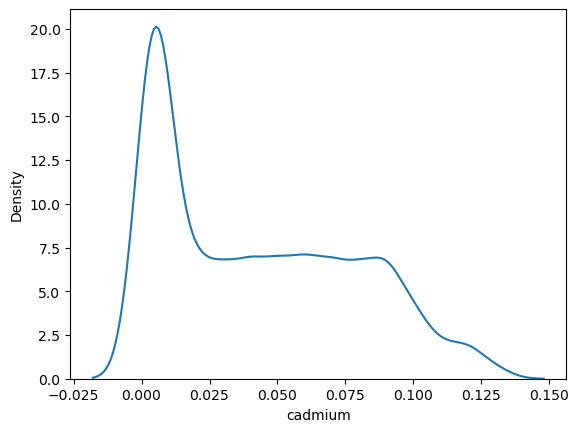

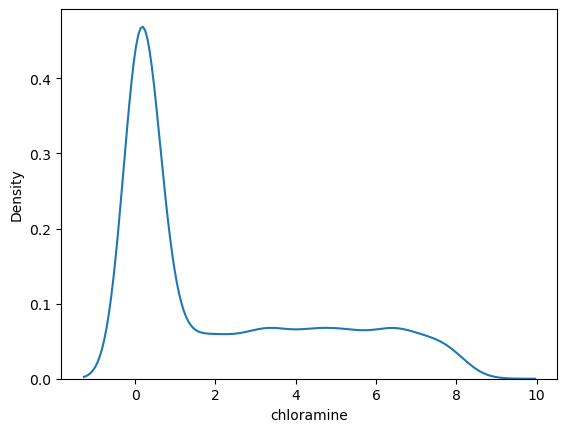

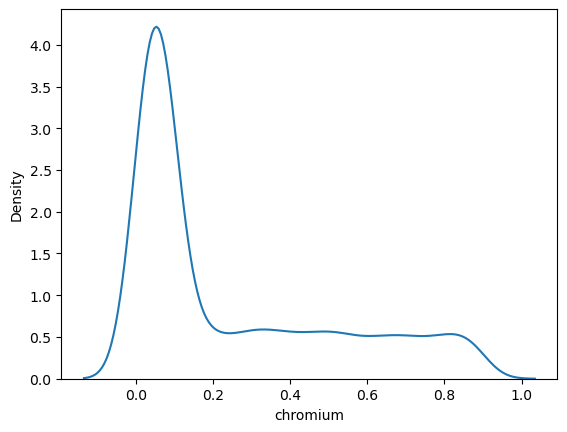

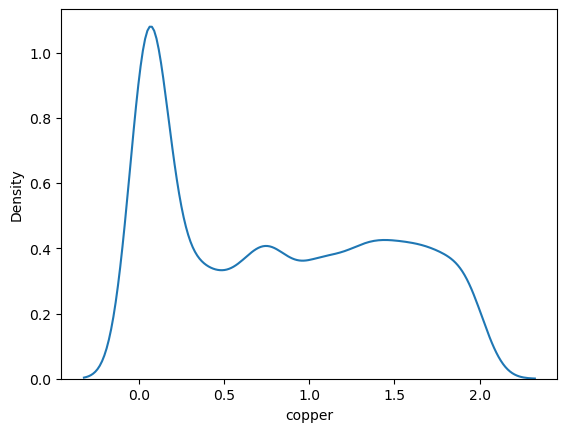

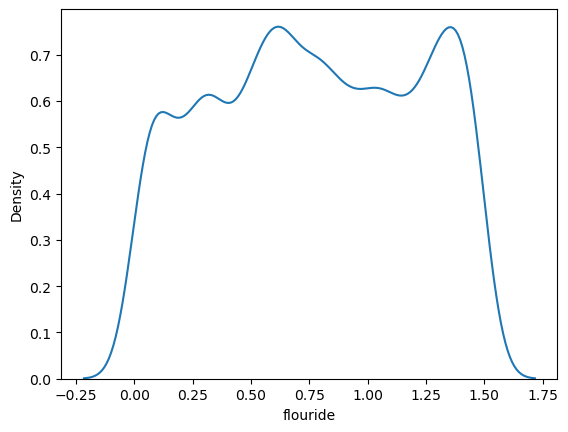

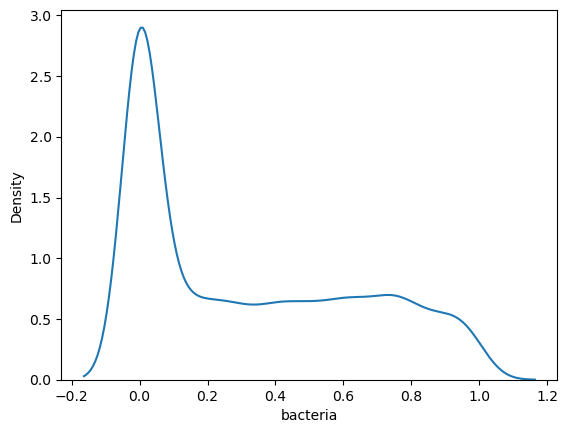

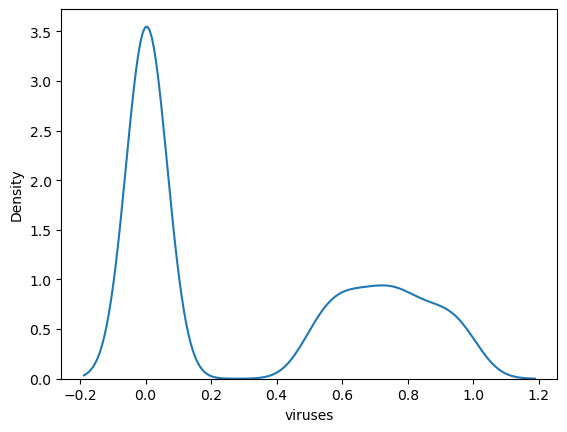

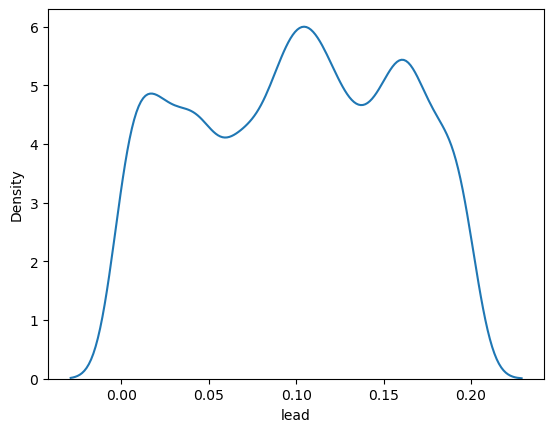

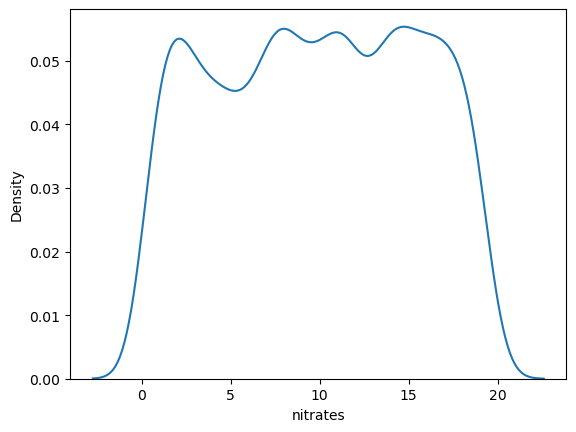

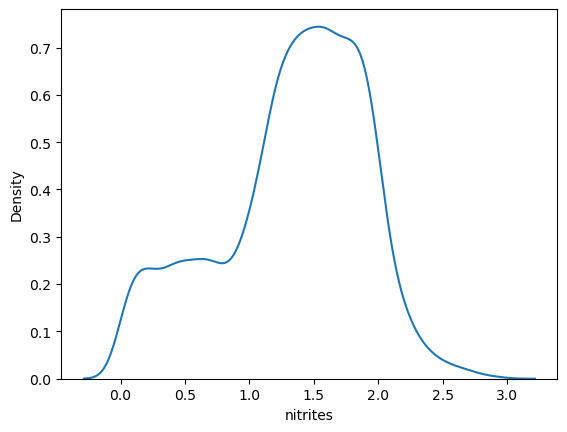

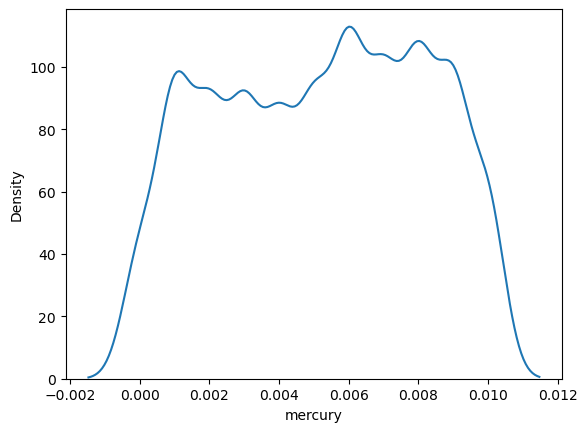

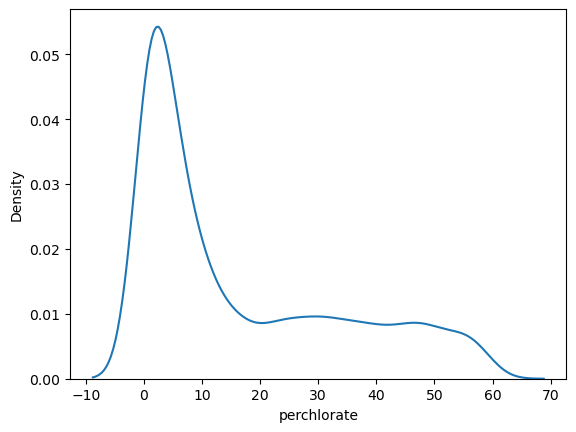

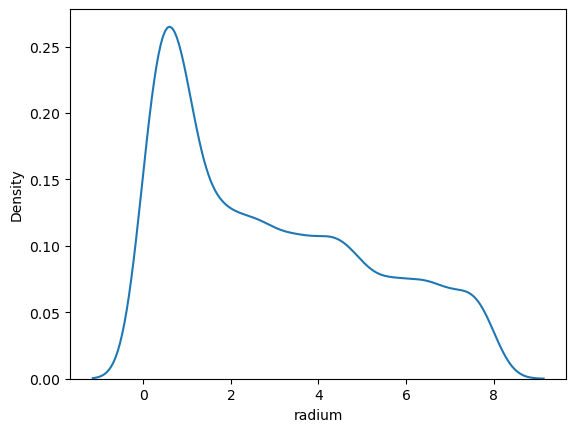

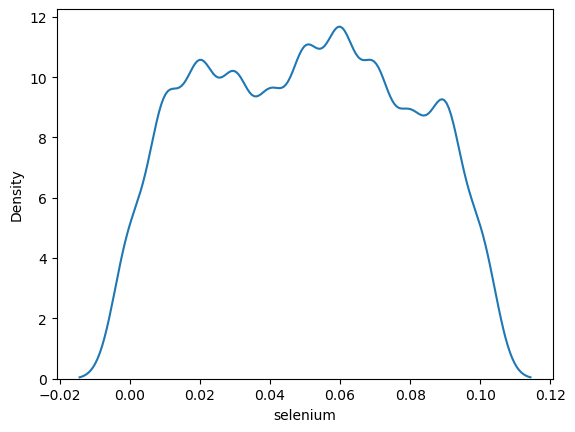

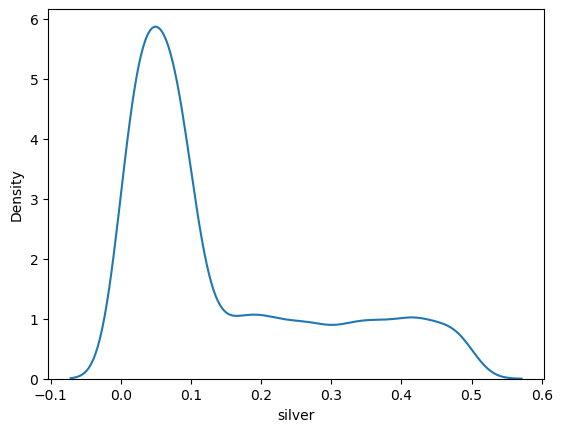

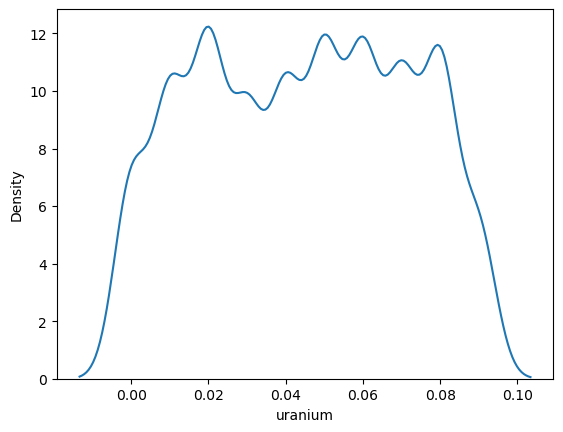

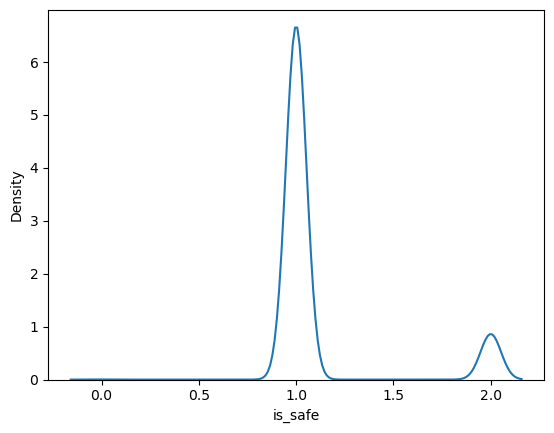

In [10]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.kdeplot( x =df[i])
        plt.show()

### Find out the outliers present in the data set using Boxplot

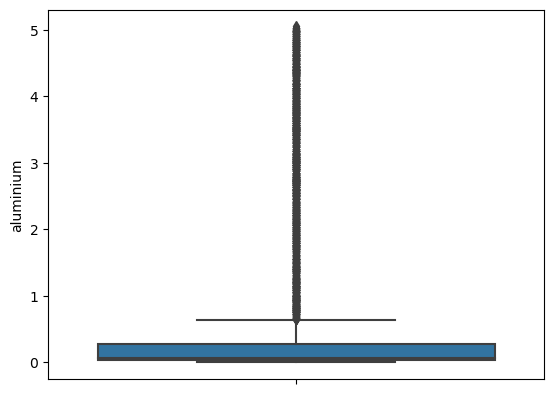

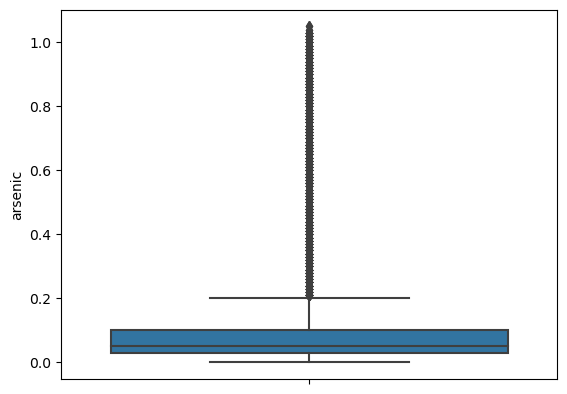

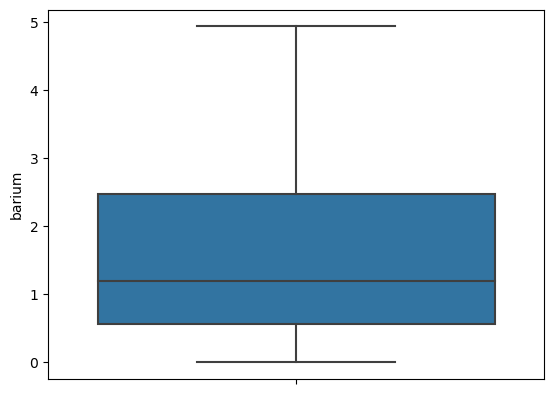

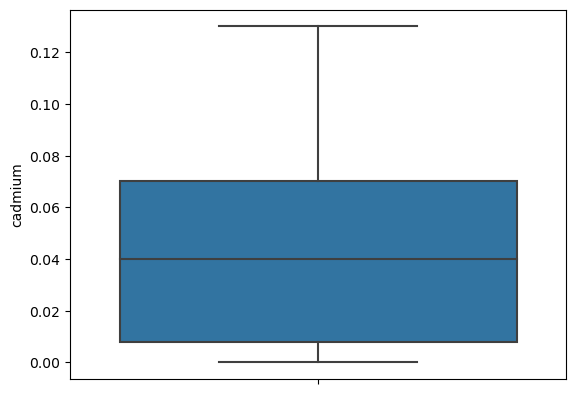

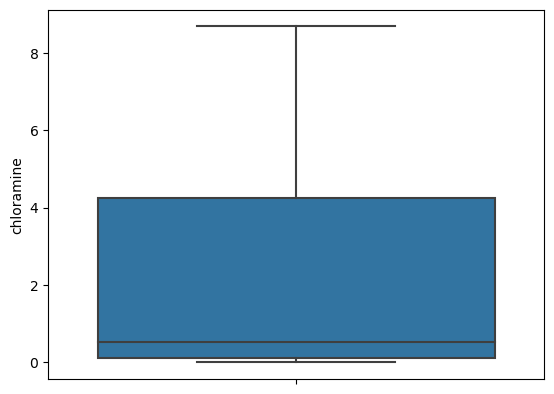

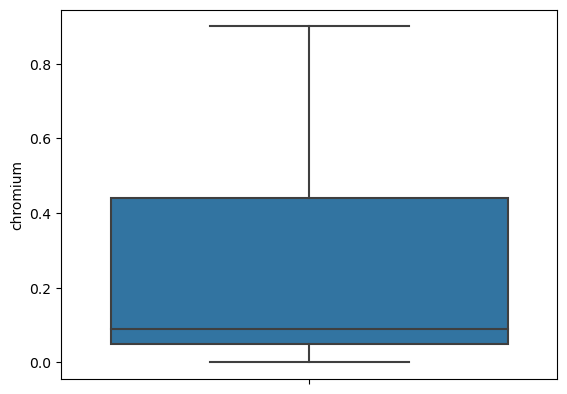

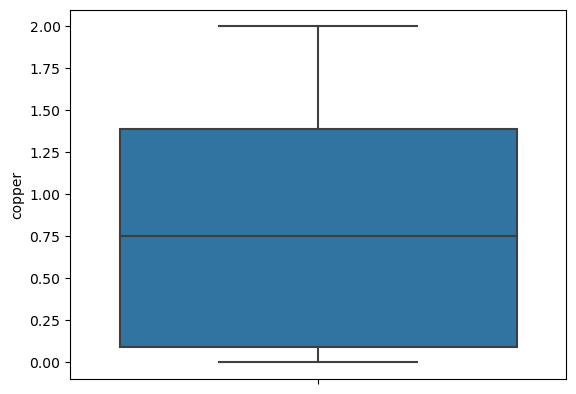

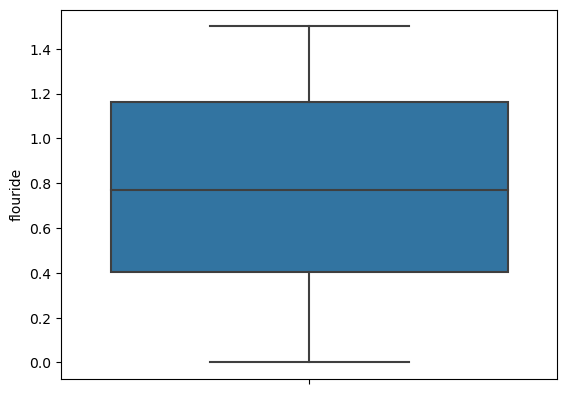

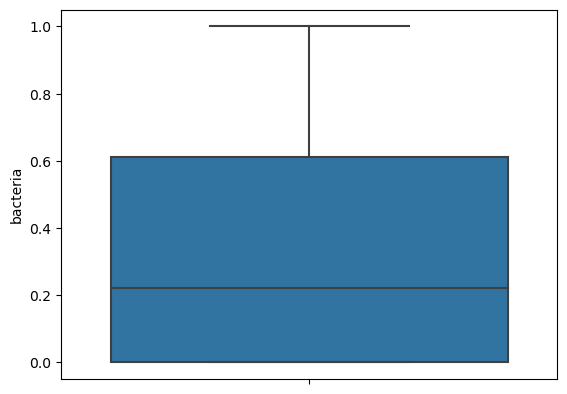

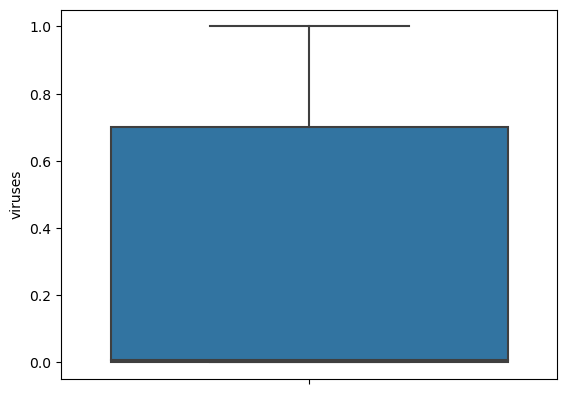

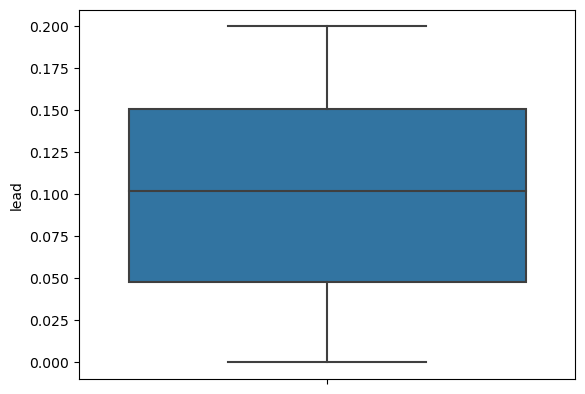

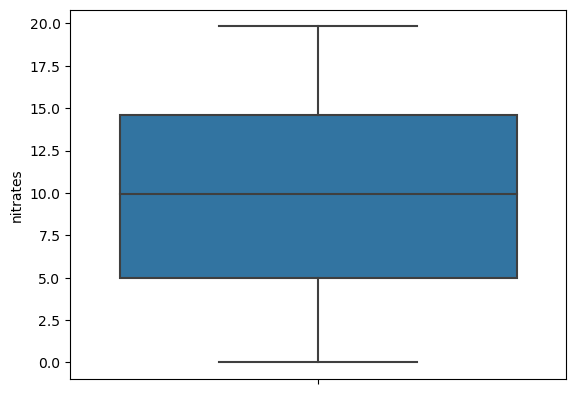

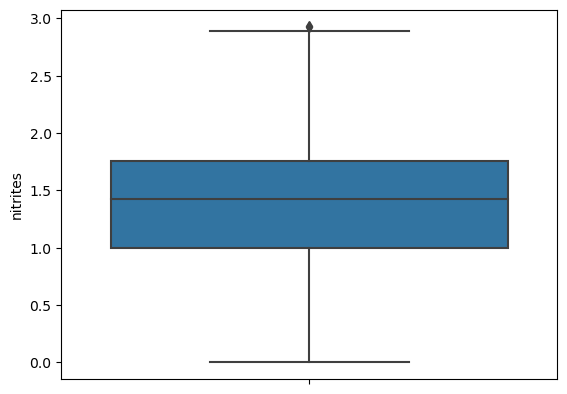

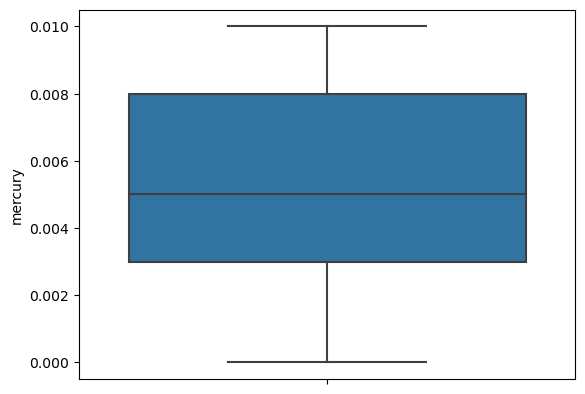

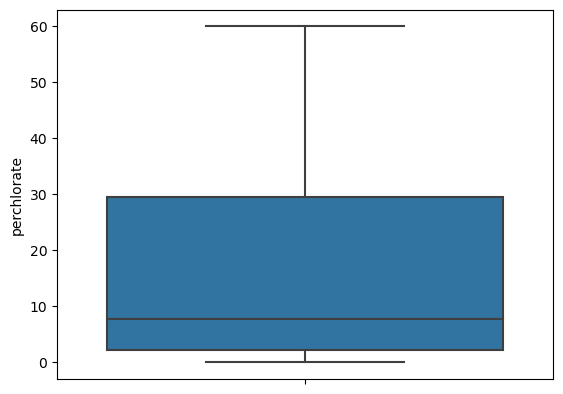

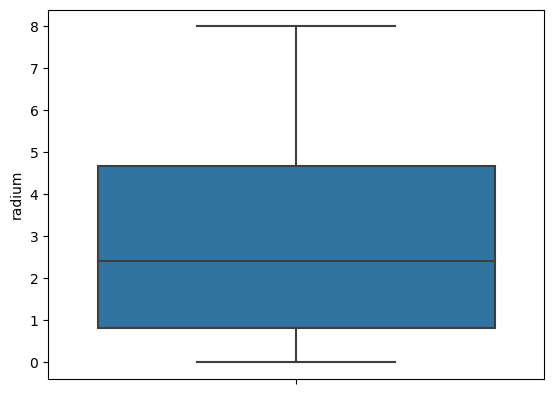

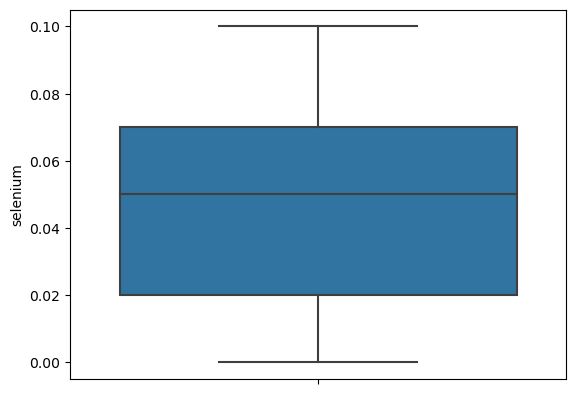

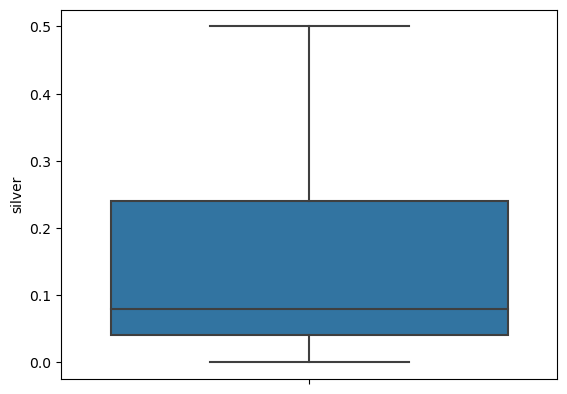

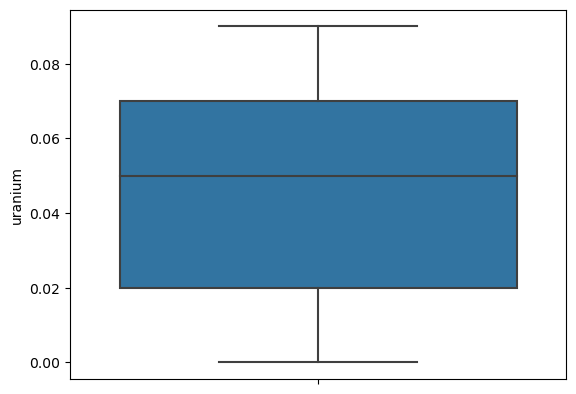

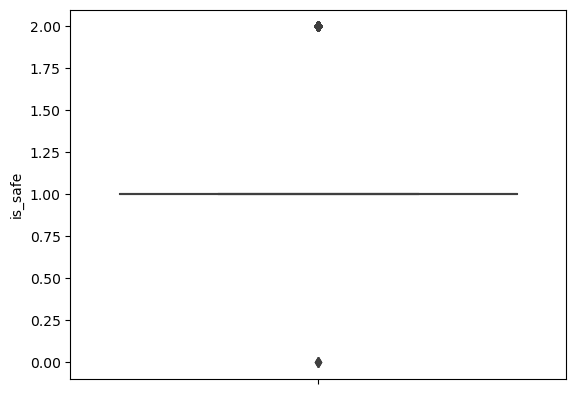

In [11]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.boxplot(y = df[column])
        plt.show()

## No outliers present.

## Checking the correlation with the target 'is safe' Correlation using Heatmap

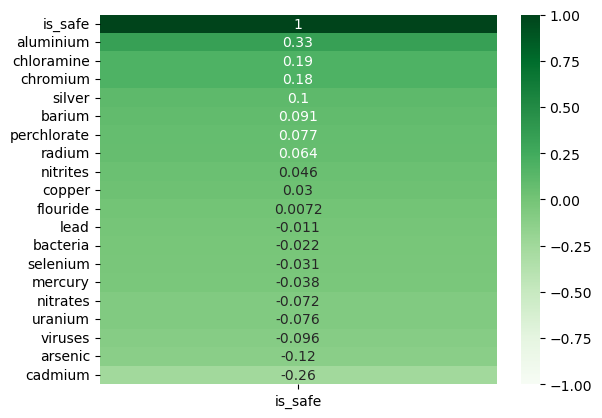

In [12]:
sns.heatmap(df.corr()[["is_safe"]].sort_values(by="is_safe", ascending=False), vmin=-1, vmax=1, annot=True,cmap="Greens");

## Lets take only the columns with good correlation with the target

### Then i take Engine and date values in x and is safe values in y for prediction purpose¶

In [13]:
x= df[['aluminium','chloramine','chromium']].values
y = df[['is_safe']].values

### Feature Scaling

### Then i take MinMaxScaler for scalling and then i done cross validation to find out the best model

In [14]:
rs =StandardScaler()

In [15]:
x = rs.fit_transform(x)

## model buliding

In [16]:
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

In [17]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="accuracy",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    print("Mean Score: ",np.mean(scores))
    print("*"*100)

cross validation model : LogisticRegression
Mean Score:  0.842485763454318
****************************************************************************************************
cross validation model : DecisionTreeClassifier
Mean Score:  0.8063601376720901
****************************************************************************************************
cross validation model : GradientBoostingClassifier
Mean Score:  0.8318607634543179
****************************************************************************************************
cross validation model : RandomForestClassifier
Mean Score:  0.8181106070087608
****************************************************************************************************


##### We may proceed with LogisticRegression as it is having the best metrics

## Model Building

## splitting the data into training and testing set

In [18]:
y = label_binarize(y, classes=[0,1,2])
n_classes = 3

In [19]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

### Model Prediction

#### Initializing the classifier

In [20]:
clf = OneVsRestClassifier(LogisticRegression())
y_score = clf.fit(x_train, y_train).decision_function(x_test)

### computing auc and roc for each class:

In [21]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

### Plotting ROC curve for specific classes

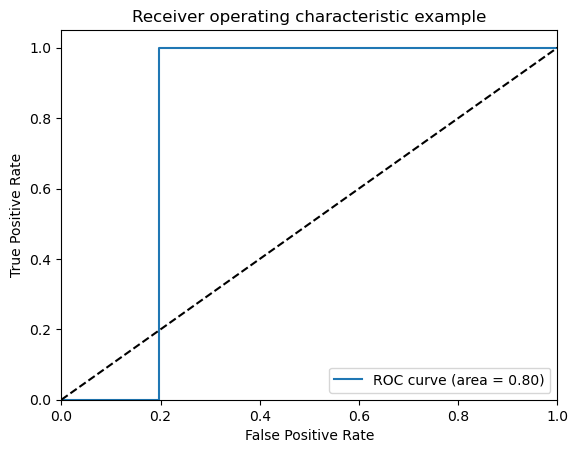

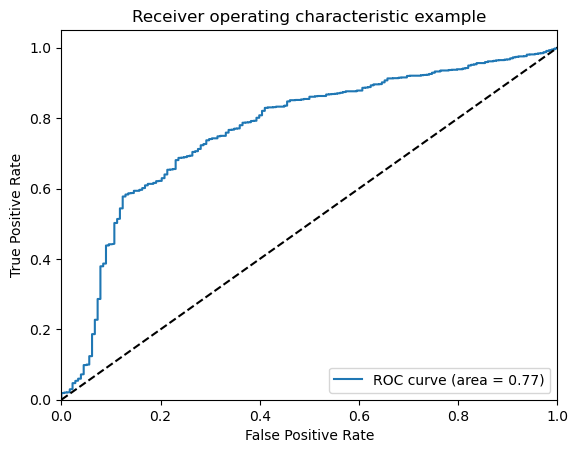

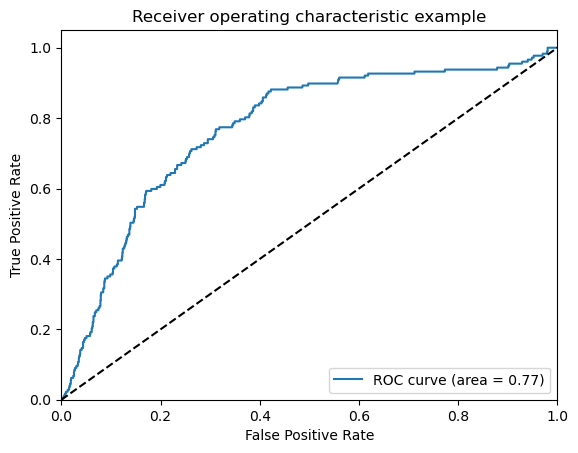

In [22]:
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label = 'ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## CONCLUSION

After the calculations i found that the safety of water is depended upon other factors also.